# Summary Report part 3

Intended audience: business stakeholders

## API

The API works as follows:

For training:
```python

methods: GET, POST

route: "/train"
   
request_json = {"query": [{"country": country,
                           "param_dim": param_dim,
                           "test": flag}]}

country must be one of ['United Kingdom', 'Portugal', 'Germany', 'EIRE', 'France',
                       'Netherlands', 'Spain', 'Norway', 'Hong Kong', 'Singapore', None]

param_dim must be one of ["very_small", "small", "medium", "large"]

flag must be True, False

```

For predicting:
```python

methods: GET, POST

route: "/predict"
   
request_json = {"query": [{"country": country,
                           "starting_dates": starting_dates}]}

country must be one of ['United Kingdom', 'Portugal', 'Germany', 'EIRE', 'France',
                       'Netherlands', 'Spain', 'Norway', 'Hong Kong', 'Singapore', None]
```


```python
starting_dates must be a _list of strings of dates, example ["2017-12-06", "2018-01-29"]
```


To retrieve specific logfiles:

```python
    methods: GET

    route: '/logs/<logfile_name>'
```

Several errors are handled in the Flask framework as well as in the hidden Python code

## Monitoring production

Let's examine how the model performs on production data

supervised_model_small_None_1.joblib
Error on production data: 188780.8


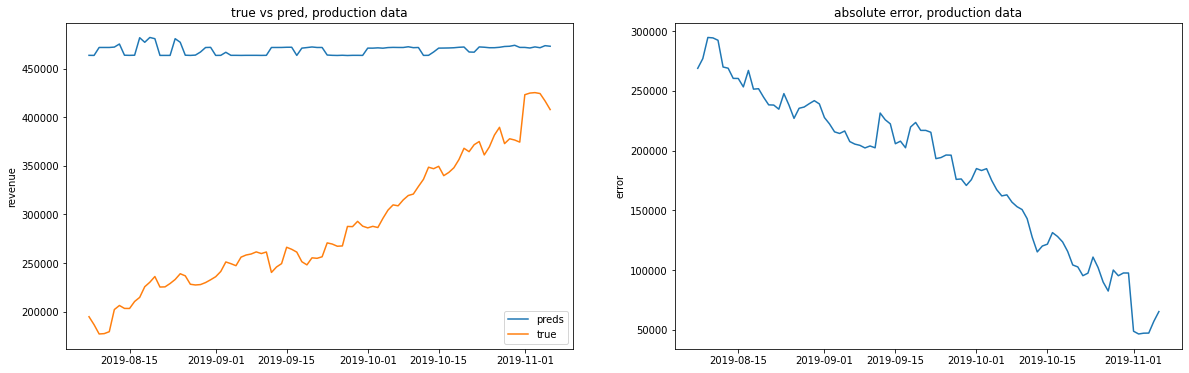

In [2]:
%run scripts/monitoring.py -c None

Unfortunately, the model does NOT perform satisfactorily on production data: from the plots it is evident that seasonality is not properly taken into account. The error obtained on the test set in the pre-production phase, which can be retrieved from the logs, is 8195.88, considerably smaller.

## Retraining data

The model can be retrained by running a single script, in case the training and production data available should increase.